In [119]:
import numpy as np
from scipy.io import loadmat
from scipy import signal
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
N = 8192 # number of samples
n = np.arange(N)
Fs = 8192 # sampling frequency
f = [444, 700, 1000]

x1 = np.cos(2*np.pi*n*f[0]/Fs)
x2 = np.cos(2*np.pi*n*f[1]/Fs)
x3 = np.cos(2*np.pi*n*f[2]/Fs)

In [3]:
Audio(x1, rate=Fs)

In [4]:
Audio(x2, rate=Fs)

In [5]:
Audio(x3, rate=Fs)

In [6]:
Audio(x1+x2+x3, rate=Fs)

In [68]:
mat = loadmat('assets/handel.mat')
y, Fs = mat['y'].flatten(), mat['Fs'].flatten()[0]
k = 0.5
d = k*np.random.randn(y.size)
noisy_y = y + d
Audio(y[:30000], rate=Fs)

In [9]:
Audio(noisy_y[:30000], rate=Fs)

## Using convolution, delay and scale the audio sample `handel`. Create an echo effect using convolution

In [69]:
delay_kernel = np.concatenate([np.zeros(100), np.array([1])])
delayed_sound = signal.convolve(y, delay_kernel, 'same')
Audio(delayed_sound[:30000], rate=Fs)

In [79]:
delayed_sound[:52]

array([ 3.70074342e-17,  1.23358114e-17, -4.93432455e-17, -2.46716228e-17,
       -4.93432455e-17,  6.16790569e-17,  0.00000000e+00,  1.23358114e-16,
        5.55111512e-17,  2.46716228e-17,  9.86864911e-17,  3.70074342e-17,
        6.16790569e-17,  8.63506797e-17,  1.23358114e-17, -3.70074342e-17,
        2.46716228e-17, -1.11022302e-16, -1.14106255e-16,  3.70074342e-17,
        2.46716228e-17,  0.00000000e+00,  4.93432455e-17, -6.16790569e-17,
       -6.16790569e-17, -8.63506797e-17,  1.48029737e-16,  0.00000000e+00,
        9.86864911e-17,  1.07938350e-16,  5.55111512e-17, -1.23358114e-17,
        7.40148683e-17, -9.86864911e-17,  3.70074342e-17, -7.40148683e-17,
        4.93432455e-17, -4.93432455e-17,  2.46716228e-17,  4.93432455e-17,
        1.48029737e-16,  2.22044605e-16,  8.01827740e-17,  1.23358114e-16,
       -2.46716228e-17, -8.01827740e-17,  6.16790569e-18, -2.46716228e-17,
        0.00000000e+00,  1.85037171e-17,  8.94346325e-17, -6.15680616e-03])

In [14]:
delayed_sound[50:55]

array([ 8.94346325e-17, -6.15680616e-03, -7.50360750e-02, -3.11688312e-02,
        6.15680616e-03])

In [17]:
scale_kernel = np.array([0.5])
scaled_sound = signal.convolve(delayed_sound, scale_kernel, 'same')
Audio(scaled_sound[:30000], rate=Fs)

In [22]:
echo_sound = y + scaled_sound
Audio(echo_sound, rate=Fs)

In [42]:
N = 8192 # number of samples
n = np.arange(N)
Fs = 8192 # sampling frequency
freqs = np.arange(1000,8000+0.0001, 1000)

freq_idx = 7

x = np.cos(2*np.pi*n*freqs[freq_idx]/Fs)
Audio(x, rate=Fs)

After 4000 Hz, aliasing occurs!!!

## Spectrograms

In [49]:
mat = loadmat('assets/toomuch.mat')
toomuch, fs = mat['toomuch'].flatten(), mat['fs'].flatten()[0]
Audio(toomuch, rate=fs)

In [65]:
B = np.array([-0.0039, 0, 0.0321, 0.1167, 0.2207, 0.2687, 0.2207, 0.1167, 0.0321, 0, -0.0039])
filtered_toomuch = signal.convolve(toomuch, B)
Audio(filtered_toomuch, rate=fs)

In [42]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map


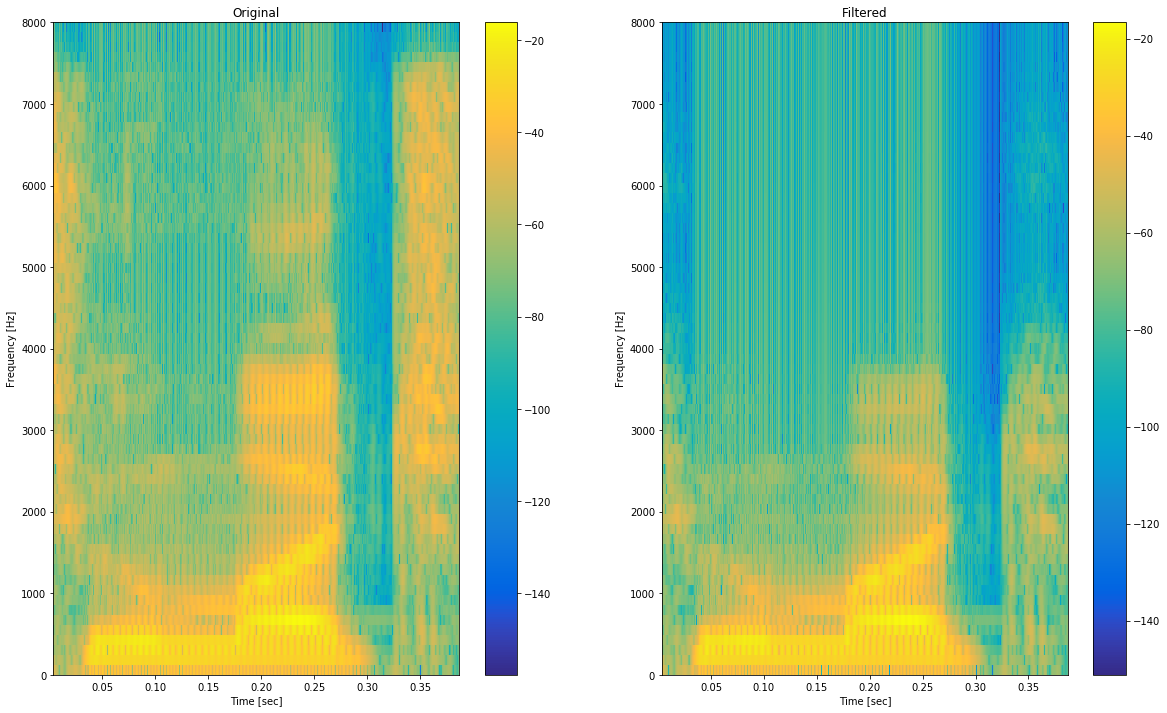

In [115]:
fig, ax = plt.subplots(1,2, figsize=(20,12))
pxx,  freq, t, im = ax[0].specgram(toomuch, Fs=fs, window=np.hamming(128), NFFT=128, noverlap=120, mode='magnitude', cmap=parula_map)
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')
ax[0].set_title('Original')   
fig.colorbar(im, ax=ax[0])

pxx_f,  freq_f, t_f, im_f = ax[1].specgram(filtered_toomuch, Fs=fs, window=np.hamming(128), NFFT=128, noverlap=120, mode='magnitude', cmap=parula_map)
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
ax[1].set_title('Filtered')   
fig.colorbar(im_f, ax=ax[1])

Convolution operator filters the highest freq. components. It behaves as a LP filter

In [118]:
mat = loadmat('assets/bird1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Tue Sep 13 16:53:52 2005',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[-0.00793457],
        [-0.00793457],
        [-0.00793457],
        ...,
        [ 0.01599121],
        [ 0.0098877 ],
        [ 0.01403809]])}

In [119]:
mat = loadmat('assets/bird1.mat')
x, Fs = mat['x'].flatten(), 8192
Audio(x, rate=Fs)

In [123]:
# Downsample the signal by a factor of 2 
x1 = x[::2]
Audio(x1, rate=Fs/2)

In [124]:
# Decimate (Low-Pass filtering + Downsampling) the signal by a factor of 2
x2 = signal.decimate(x, 2)
Audio(x2, rate=Fs/2)

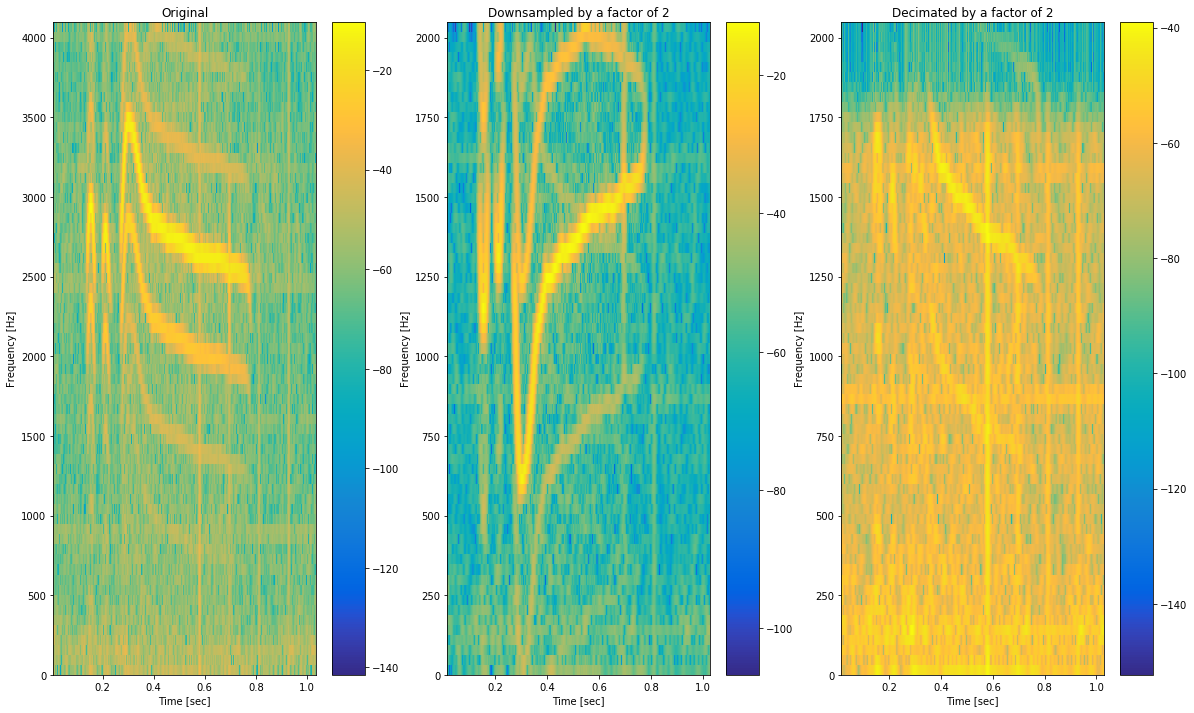

In [125]:
fig, ax = plt.subplots(1,3, figsize=(20,12))
_,  _, _, im = ax[0].specgram(x, Fs=Fs, window=np.hamming(128), NFFT=128, noverlap=120, mode='magnitude', cmap=parula_map)
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')
ax[0].set_title('Original')   
fig.colorbar(im, ax=ax[0])

_,  _, _, im = ax[1].specgram(x1, Fs=Fs/2, window=np.hamming(128), NFFT=128, noverlap=120, mode='magnitude', cmap=parula_map)
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
ax[1].set_title('Downsampled by a factor of 2')   
fig.colorbar(im, ax=ax[1])

_,  _, _, im = ax[2].specgram(x2, Fs=Fs/2, window=np.hamming(128), NFFT=128, noverlap=120, mode='magnitude', cmap=parula_map)
ax[2].set_ylabel('Frequency [Hz]')
ax[2].set_xlabel('Time [sec]')
ax[2].set_title('Decimated by a factor of 2')   
fig.colorbar(im, ax=ax[2])

## Emphasize low frequencies of signal with different gains
- Emphasized version is the sum of the original signal and the one with only low frequencies

In [126]:
mat = loadmat('assets/handel.mat')
y, Fs = mat['y'].flatten(), mat['Fs'].flatten()[0]
Audio(y, rate=Fs)

In [129]:
b = np.array([-0.0039, 0, 0.0321, 0.1167, 0.2207, 0.2687, 0.2207, 0.1167, 0.0321, 0, -0.0039])
z = signal.convolve(y, b, mode='same')
Audio(z, rate=Fs)

In [130]:
# low frequncies emphasized = gain * (low-pass version) + original
k = 2;
y2 = k*z + y
Audio(y2, rate=Fs)

In [131]:
k = 6
y3 = k*z + y
Audio(y3, rate=Fs)

## Convolution

In [4]:
x = np.array([1,2,3]) # signal
h1 = np.array([1,1,1]) # unit sample response of the system 1
h2 = 0.9 ** np.arange(11) # unit sample response of the system 2

y1 = signal.convolve(x, h1)
y2 = signal.convolve(y1, h2)

print("y1={}".format(y1))
print("y2={}".format(y2))

y1=[1 3 6 5 3]
y2=[ 1.          3.9         9.51       13.559      15.2031     13.68279
 12.314511   11.0830599   9.97475391  8.97727852  8.07955067  6.957785
  5.32057472  2.90565367  1.04603532]


What happens if we change the order of two systems, i.e. h1 & h2 ? 

In [5]:
y1hat = signal.convolve(x, h2)
y2hat = signal.convolve(y1hat, h1)

print("y1hat={}".format(y1hat))
print("y2hat={}".format(y2hat))

y1hat=[1.         2.9        5.61       5.049      4.5441     4.08969
 3.680721   3.3126489  2.98138401 2.68324561 2.41492105 1.85961835
 1.04603532]
y2hat=[ 1.          3.9         9.51       13.559      15.2031     13.68279
 12.314511   11.0830599   9.97475391  8.97727852  8.07955067  6.957785
  5.32057472  2.90565367  1.04603532]


After we change the order of two systems, y1[n] changes but the resulting signal does not change. Because, convolution has commutative property

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This s

Text(0.5, 1.0, 'y2hat[n]')

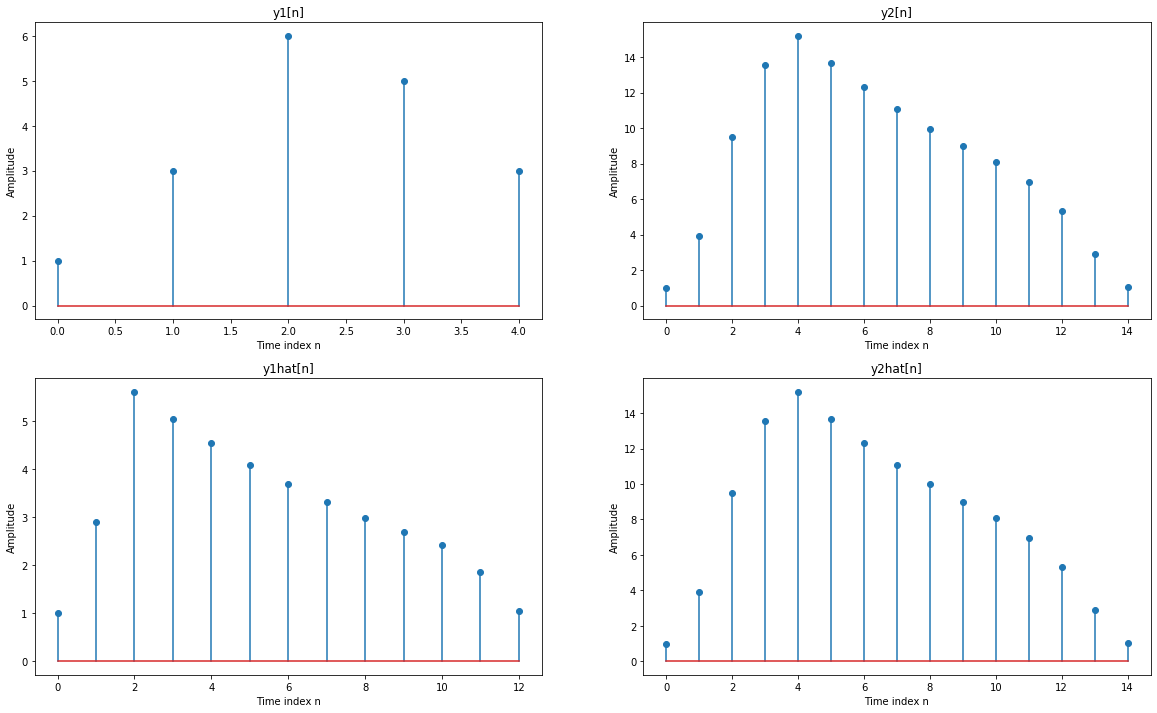

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0][0].stem(y1)
ax[0][0].set_xlabel('Time index n')
ax[0][0].set_ylabel('Amplitude')
ax[0][0].set_title('y1[n]')

ax[0][1].stem(y2)
ax[0][1].set_xlabel('Time index n')
ax[0][1].set_ylabel('Amplitude')
ax[0][1].set_title('y2[n]')

ax[1][0].stem(y1hat)
ax[1][0].set_xlabel('Time index n')
ax[1][0].set_ylabel('Amplitude')
ax[1][0].set_title('y1hat[n]')

ax[1][1].stem(y2hat)
ax[1][1].set_xlabel('Time index n')
ax[1][1].set_ylabel('Amplitude')
ax[1][1].set_title('y2hat[n]')

If you look at the signal lengths, the relation is as follows: Nx= 3, Nh1 = 3, Nh2= 11, Ny1=Nx+Nh1-1= 5, Ny2=Ny1+Nh2-1=15

## DFT/FFT

In [8]:
Nfft = 512
sig = np.array([-1, 2, 3, 1])
sig_fft = np.fft.fft(sig, Nfft)
sig_fft

array([ 5.        +0.j        ,  4.99826824-0.13497399j,
        4.99307446-0.26985004j,  4.98442311-0.40453034j,
        4.9723216 -0.53891724j,  4.95678032-0.67291339j,
        4.93781257-0.80642179j,  4.91543462-0.93934595j,
        4.88966563-1.07158992j,  4.86052766-1.20305843j,
        4.82804563-1.33365693j,  4.79224732-1.46329173j,
        4.75316332-1.59187007j,  4.710827  -1.71930022j,
        4.66527447-1.84549153j,  4.61654456-1.97035457j,
        4.56467877-2.09380117j,  4.50972121-2.21574455j,
        4.45171857-2.33609935j,  4.39072007-2.45478175j,
        4.32677742-2.57170953j,  4.25994474-2.68680215j,
        4.19027851-2.79998083j,  4.11783751-2.91116863j,
        4.04268279-3.02029051j,  3.96487756-3.12727338j,
        3.88448715-3.23204621j,  3.80157892-3.33454006j,
        3.71622223-3.43468817j,  3.62848834-3.53242598j,
        3.5384503 -3.62769124j,  3.44618297-3.72042401j,
        3.35176284-3.81056674j,  3.25526802-3.89806434j,
        3.15677812-3.98286418j,

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 1.0, 'Phase')

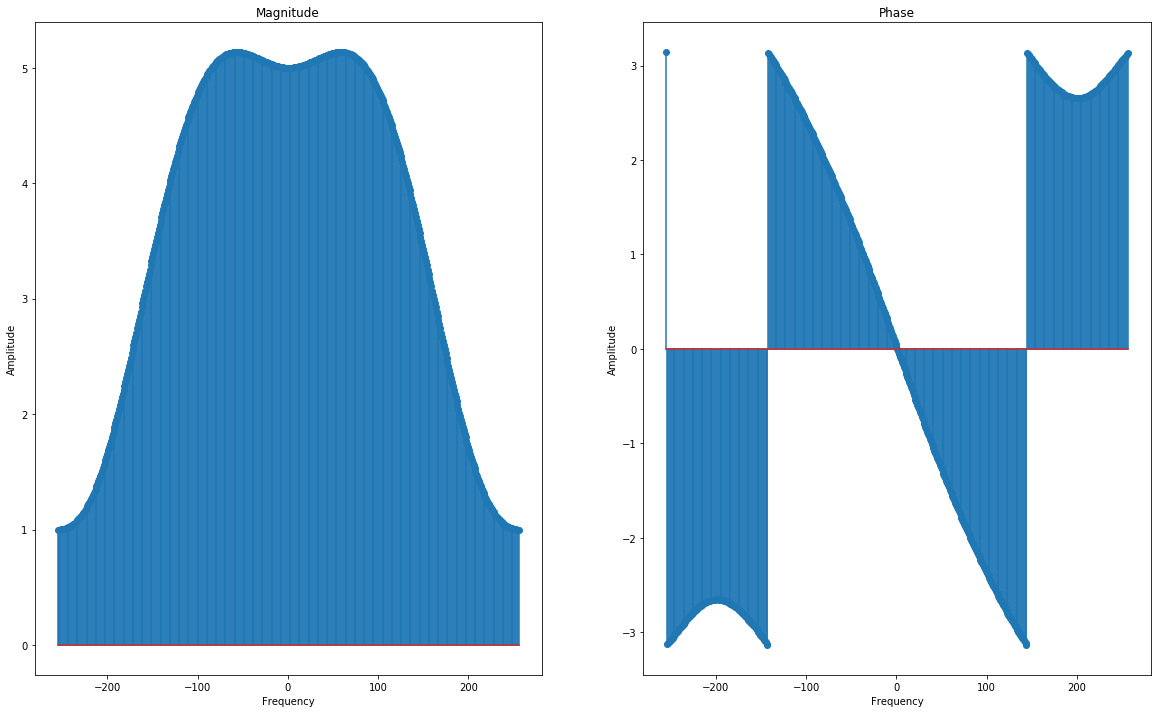

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,12))
ax[0].stem(np.arange(-Nfft/2+1, Nfft/2+1), np.abs(np.fft.fftshift(sig_fft)))
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Magnitude')

ax[1].stem(np.arange(-Nfft/2+1, Nfft/2+1), np.angle(np.fft.fftshift(sig_fft)))
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Phase')

## Filter an input signal x[n] with the systems y1[n], and y2[n]

In [10]:
# input signal
x = np.array([0, 2, 1, 0, 0, 0, 0]) 
# coefficients of the following fir filter, i.e. y1[n] = 3*x[n] + 2*x[n-1] -3*x[n-2] + x[n-4]
h1 = np.array([3, 2, -3, 0, 1], dtype='float')     
# nominator & denominator of the following iir filter, y2[n] = -0.9*y2[n-1] + x[n]
h2_a = np.array([1, 0.9], dtype='float')          
h2_b = np.array([1.0])

y1 = signal.lfilter(h1, 1, x)
y2 = signal.lfilter(h2_b, h2_a, x)

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 1.0, 'y2[n]')

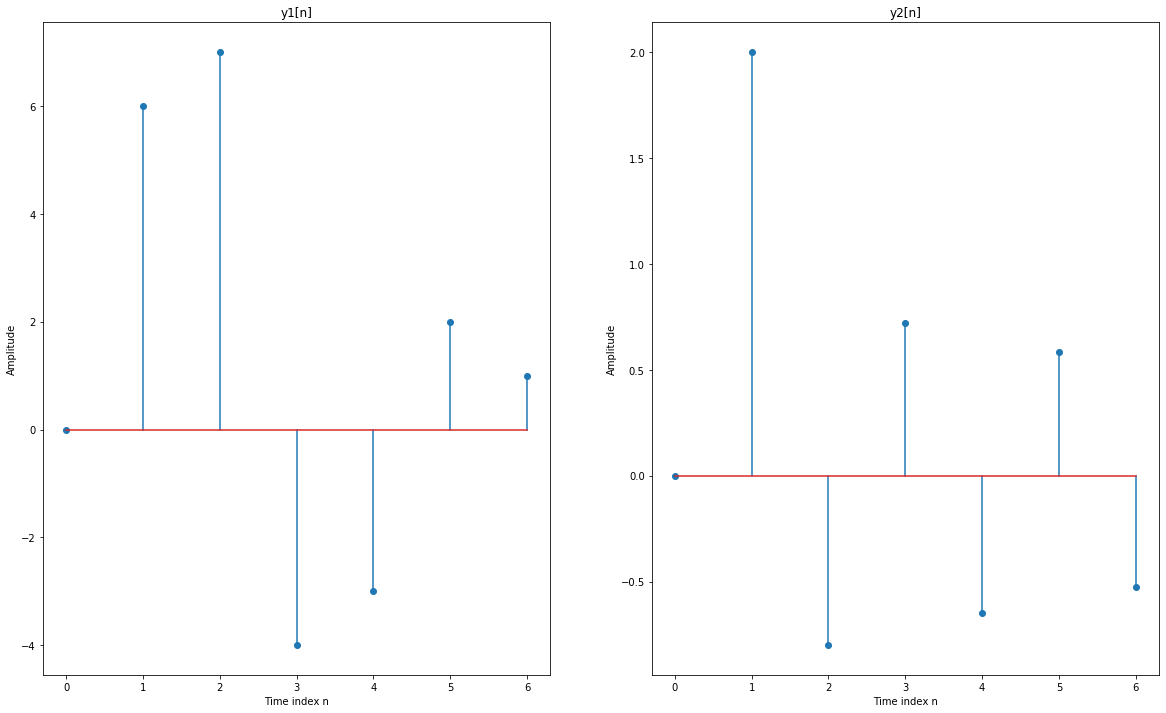

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20,12))
ax[0].stem(y1)
ax[0].set_xlabel('Time index n')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('y1[n]')

ax[1].stem(y2)
ax[1].set_xlabel('Time index n')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('y2[n]')

## Impulse Response of the filters:
1. y[n] = -0.9*y[n-1] + x[n]
2. y[n] = -0.9*y[n-1] - 0.2*y[n-2] + x[n]
3. y[n] = y[n-1] + x[n-1]
3. y[n] = 2*y[n-1] - 2*x[n-1]

In [13]:
Npoint = 100
t1, h1 = signal.dimpulse((np.array([1]), np.array([1, 0.9]), 1), n=Npoint)
t2, h2 = signal.dimpulse((np.array([1]), np.array([1, 0.9, 0.2]), 1), n=Npoint)
t3, h3 = signal.dimpulse((np.array([0, 1]), np.array([1, -1]), 1), n=Npoint)
t4, h4 = signal.dimpulse((np.array([0, -2]), np.array([1, -2]), 1), n=Npoint)

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/scipy/signal/filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This s

Text(0.5, 1.0, 'h4')

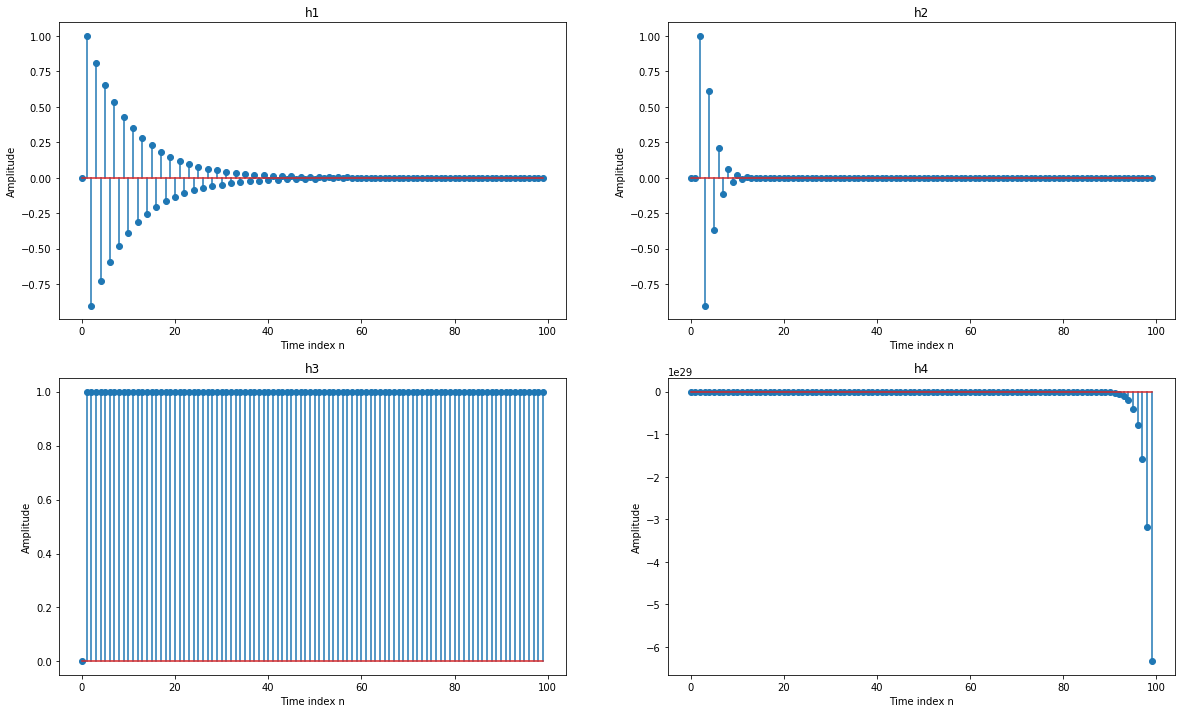

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0][0].stem(t1.flatten(), h1[0].flatten())
ax[0][0].set_xlabel('Time index n')
ax[0][0].set_ylabel('Amplitude')
ax[0][0].set_title('h1')

ax[0][1].stem(t2.flatten(), h2[0].flatten())
ax[0][1].set_xlabel('Time index n')
ax[0][1].set_ylabel('Amplitude')
ax[0][1].set_title('h2')

ax[1][0].stem(t3.flatten(), h3[0].flatten())
ax[1][0].set_xlabel('Time index n')
ax[1][0].set_ylabel('Amplitude')
ax[1][0].set_title('h3')

ax[1][1].stem(t4.flatten(), h4[0].flatten())
ax[1][1].set_xlabel('Time index n')
ax[1][1].set_ylabel('Amplitude')
ax[1][1].set_title('h4')

## Proof of Linearity and Time Shifting Property of DTFT

In [20]:
# Proof of linearity
N = 100
n = np.arange(N)
g = np.exp(-0.5*n)
h = np.sin(2*np.pi*n/(N/2))

a, b = 2, 3
sig = a*g + b*h

w, G = signal.freqz(g, 1, worN=256)
w, H = signal.freqz(h, 1, worN=256)
w, S = signal.freqz(sig, 1, worN=256)
Shat = a*G + b*H
np.linalg.norm(S-Shat)

8.884835160000773e-14

In [27]:
# Proof of linearity
n0 = 2  # amount of time shift
gshifted = np.concatenate((np.zeros(2), g ))

w, Gshifted = signal.freqz(gshifted, 1, worN=256)
Gshifted_hat = np.exp(-1j*w*n0) * G
np.linalg.norm(Gshifted - Gshifted_hat)

4.8927321330977484e-15

## `corrupt.mat` is the corrupted version of `handel.mat` test signal. If we assume that the corruption process has been linear,i.e. it can be presented with convolution z[n] = y[n] * h[n], where h[n] is the impulse response of the corrupting filter and y[n] is the original signal, we can solve this process with DFT. Since DFT transforms convolution in to a multiplication, we can present the corrupting process Z[n] = Y[n]H[n]

In [34]:
mat = loadmat('assets/handel.mat')
y, Fs = mat['y'].flatten(), mat['Fs'].flatten()[0]
z = loadmat('assets/corrupt.mat')['z'].flatten()

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

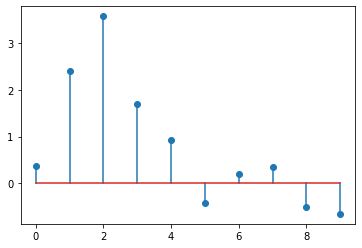

In [37]:
NFFT = 256
Z = np.fft.fft(z, NFFT)
Y = np.fft.fft(y, NFFT)
H = Z / Y
h = np.fft.ifft(H)
plt.stem(h[:10])

## Ideal Low-Pass Filter
- Ideal low-pass filter has rectangular form in frequency domain, whose inverse is sinc

In [38]:
mat = loadmat('assets/handel.mat')
y, Fs = mat['y'].flatten(), mat['Fs'].flatten()[0]

fc = 0.15;
h = 2 * fc * np.sinc(2*fc*np.arange(-5, 6))
h20 = 2 * fc * np.sinc(2*fc*np.arange(-20, 21))

yconv5 = signal.convolve(y, h)
yconv20 = signal.convolve(y, h20)

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 0, 'Time [sec]')

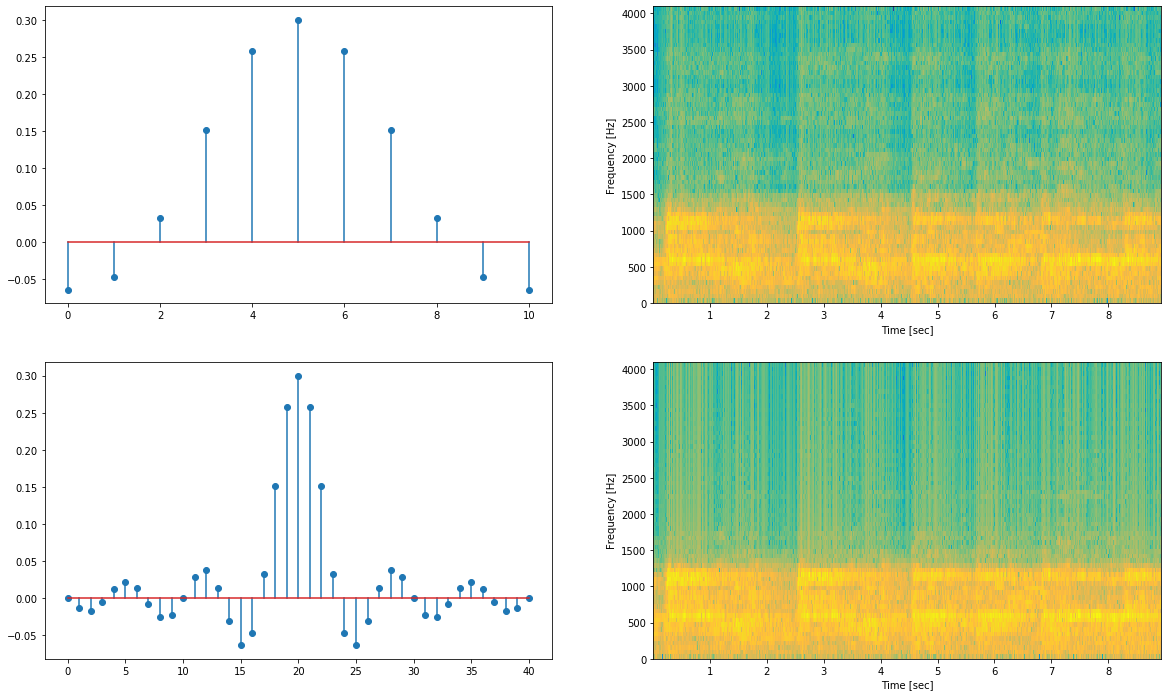

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0][0].stem(h)
ax[0][1].specgram(yconv5, Fs=Fs, window=np.hamming(128), NFFT=128, noverlap=120, mode='magnitude', cmap=parula_map)
ax[0][1].set_ylabel('Frequency [Hz]')
ax[0][1].set_xlabel('Time [sec]')
ax[1][0].stem(h20)
ax[1][1].specgram(yconv20, Fs=Fs, window=np.hamming(128), NFFT=128, noverlap=120, mode='magnitude', cmap=parula_map)
ax[1][1].set_ylabel('Frequency [Hz]')
ax[1][1].set_xlabel('Time [sec]')



## Sinusoidal signal

DFT length $N$ determines the frequency spacing between the locations of the DFT samples and the time it takes to compute the DFT samples. A large $N$ makes the scpaing smaller, providing higher resolution in the frequency domain, but increases the computation time. The frequency $f_k$ in Hz corresponding to the DFT index (bin number) $k$ is given by

$$
f_k = \frac{k.F_T}{N}, k=0,1,...,N-1
$$

where $F_T$ is the sampling frequency.

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'DFT of x[n]')

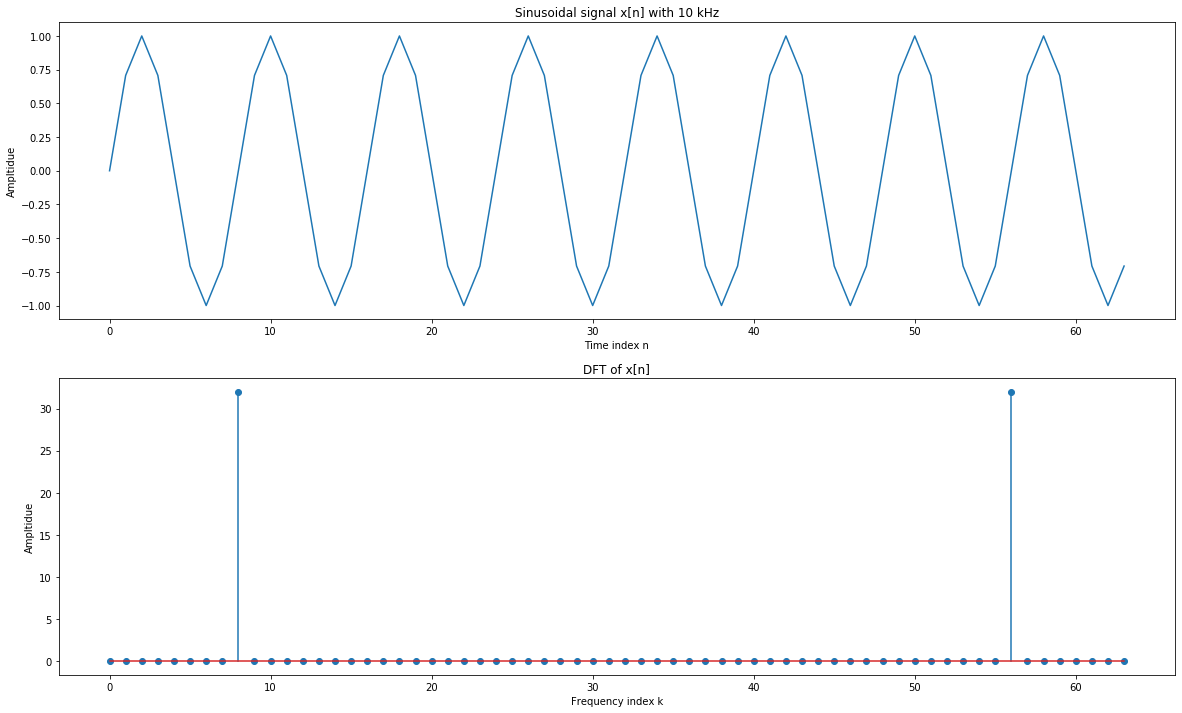

In [48]:
F0 = 10 # sinusoidal frequency (10 kHz)
Fs = 80 # Sampling frequency (80 kHz)
L = 64  # Length of the signal
n = np.arange(L) # time index n

x = np.sin(2*np.pi*F0*n/Fs) # signal
X = np.fft.fft(x, L)

fig, ax = plt.subplots(2, 1, figsize=(20,12))
ax[0].plot(n, x)
ax[0].set_xlabel('Time index n')
ax[0].set_ylabel('Ampltidue')
ax[0].set_title('Sinusoidal signal x[n] with 10 kHz')

ax[1].stem(n, abs(X))
ax[1].set_xlabel('Frequency index k')
ax[1].set_ylabel('Ampltidue')
ax[1].set_title('DFT of x[n]')

## Circular convolution of two length-N sequences via DFT-based approach

In [65]:
g = np.array([5, -2, 2, 0, 4, 3])
h = np.array([3, 1, -2, 2, -4, 4])

G = np.fft.fft(g)
H = np.fft.fft(h)

dft_gh = np.fft.ifft(G * H)
dft_gh
#cconv_gh = signal.convolve(g, np.concatenate((h,h)))

array([ -6.+0.j,   9.+0.j, -16.+0.j,  20.+0.j,  -4.+0.j,  45.+0.j])

In [67]:
n = np.arange(5)
x = np.cos(np.pi*n/2)
y = 3 ** n

X = np.fft.fft(x)
Y = np.fft.fft(y)

dft_xy = np.fft.ifft(X * Y)
dft_xy

array([-23.+0.j, -69.+0.j,  35.+0.j, 105.+0.j,  73.+0.j])

## Fourier Domain Filtering

In [117]:
t = np.arange(0, 10.24, 0.01)
f = np.exp(-t) * np.sin(10*t)
noise = np.random.rand(len(f))
sig = f + noise

F = np.fft.fft(f)
S = np.fft.fft(sig)
S[1] = 0 

# Do low-pass filtering by zeroing out the center of the DFT, K is the band-limit
K = 40
Sout = S.copy()
Sout[K-1:-K] = 0

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'DFT of Filtered signal')

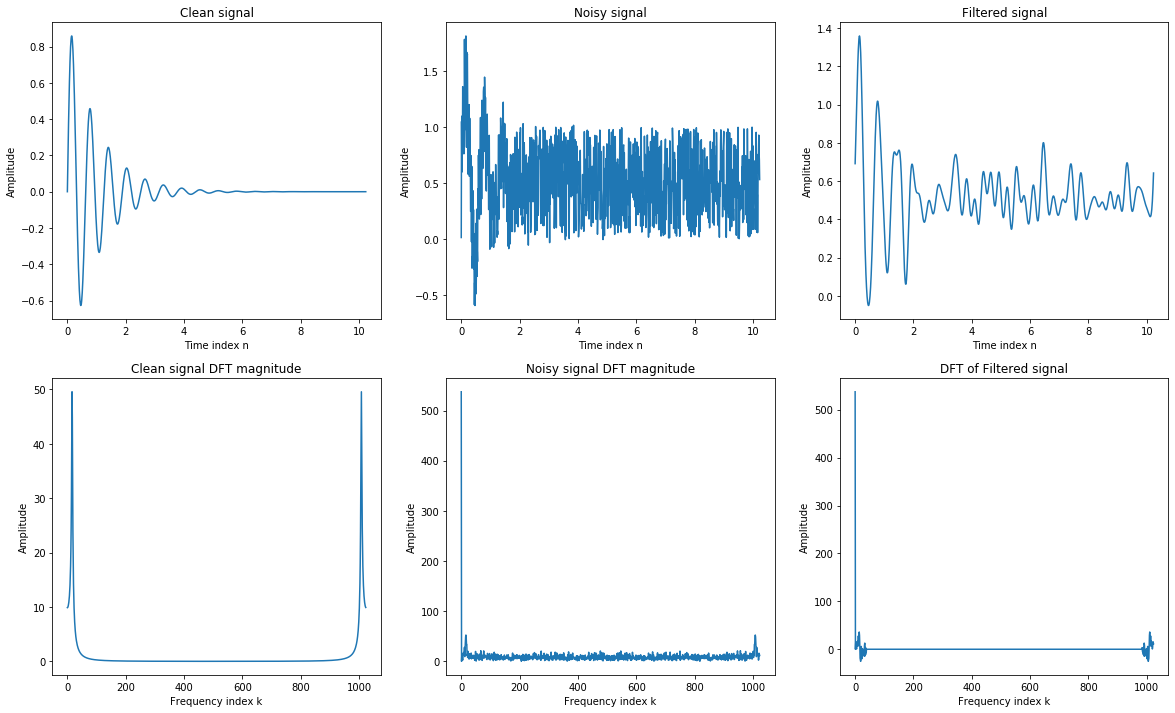

In [118]:
fig, ax = plt.subplots(2, 3, figsize=(20,12))
ax[0][0].plot(t, f)
ax[0][0].set_xlabel('Time index n')
ax[0][0].set_ylabel('Amplitude')
ax[0][0].set_title('Clean signal')

ax[0][1].plot(t, signal)
ax[0][1].set_xlabel('Time index n')
ax[0][1].set_ylabel('Amplitude')
ax[0][1].set_title('Noisy signal')

ax[0][2].plot(t, np.real(np.fft.ifft(Sout)))
ax[0][2].set_xlabel('Time index n')
ax[0][2].set_ylabel('Amplitude')
ax[0][2].set_title('Filtered signal')

ax[1][0].plot(np.abs(F))
ax[1][0].set_xlabel('Frequency index k')
ax[1][0].set_ylabel('Amplitude')
ax[1][0].set_title('Clean signal DFT magnitude')

ax[1][1].plot(np.abs(S))
ax[1][1].set_xlabel('Frequency index k')
ax[1][1].set_ylabel('Amplitude')
ax[1][1].set_title('Noisy signal DFT magnitude')

ax[1][2].plot(Sout)
ax[1][2].set_xlabel('Frequency index k')
ax[1][2].set_ylabel('Amplitude')
ax[1][2].set_title('DFT of Filtered signal')

## Low-pass filtering with Moving Average Filter

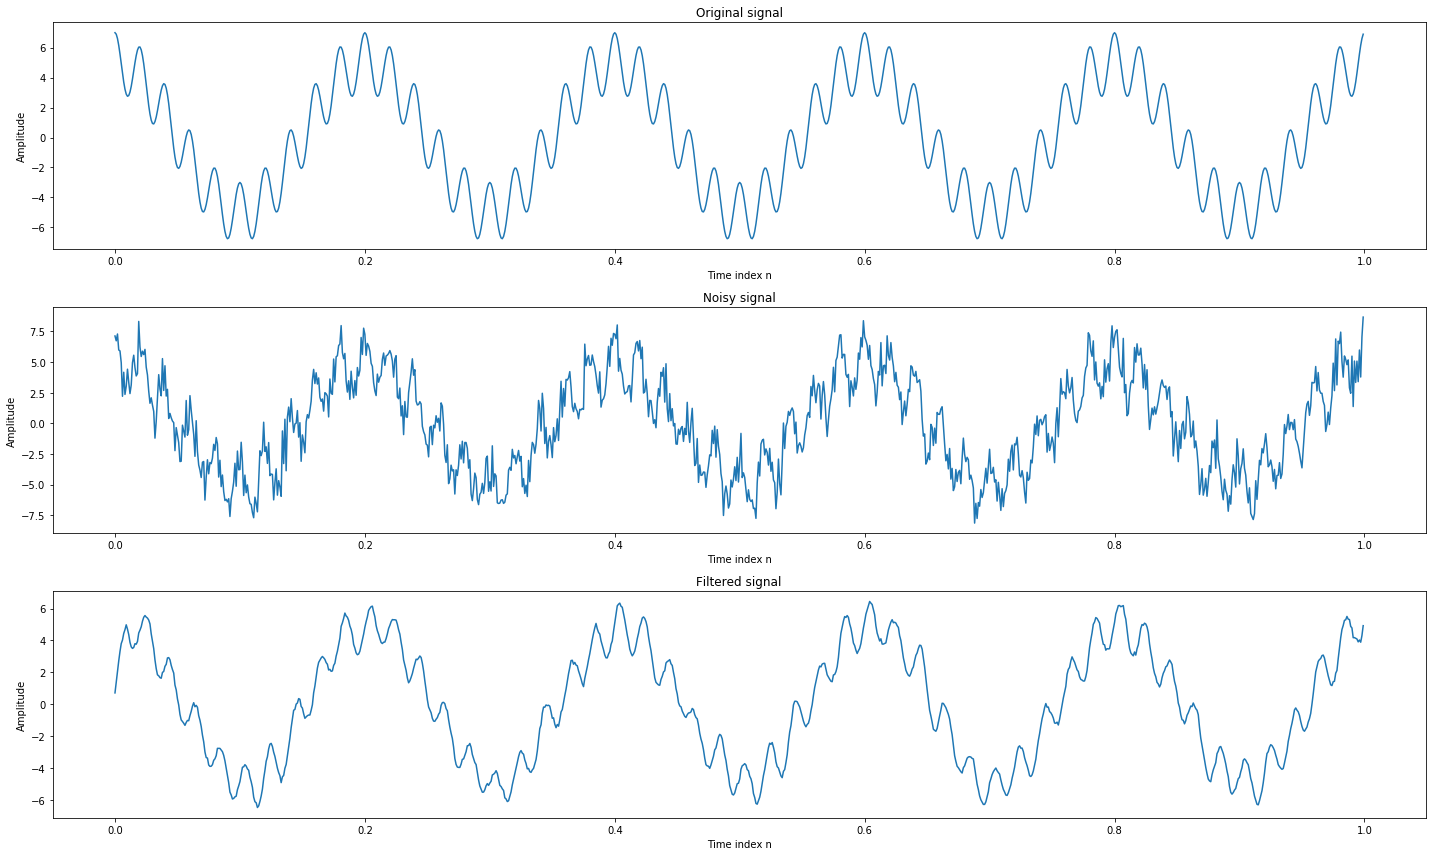

In [121]:
N = 1000
n = np.arange(N)
Fs = 1000
x = 5*np.cos(2*np.pi*5*n/Fs) + 2*np.cos(2*np.pi*50*n/Fs)
xnoisy = x + np.random.randn(x.size)

kernel_size = 10
kernel = np.ones(kernel_size) / 10
xfiltered = signal.lfilter(kernel, 1, xnoisy)

fig, ax = plt.subplots(3, 1, figsize=(20,12))
ax[0].plot(n/Fs, x)
ax[0].set_xlabel('Time index n')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Original signal')

ax[1].plot(n/Fs, xnoisy)
ax[1].set_xlabel('Time index n')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Noisy signal')

ax[2].plot(n/Fs, xfiltered)
ax[2].set_xlabel('Time index n')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Filtered signal')

plt.tight_layout()

## Butterworth analogue low-pass  filter

In [127]:
N, Wn = signal.buttord(2*np.pi*1500, 2*np.pi*6000, 0.25, 25, True)
# Determine the transfer function
num, den = signal.butter(N, Wn, analog=True)

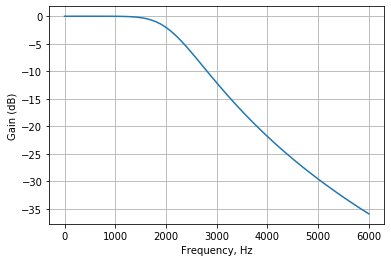

In [131]:
omega = np.arange(0, 12000*np.pi+0.0001, 200*np.pi)
w, h = signal.freqs(num, den, worN=omega)

plt.plot(omega/(2*np.pi), 20*np.log10(np.abs(h)))
plt.xlabel('Frequency, Hz')
plt.ylabel('Gain (dB)')
plt.grid()

## Elliptic analogue band-pass filter

In [135]:
Wp = [20*1000*2*np.pi, 45*1000*2*np.pi]
Ws = [15*1000*2*np.pi, 50*1000*2*np.pi]
N, Wn = signal.ellipord(Wp, Ws, 0.25, 50, True)
num, den = signal.ellip(N, 0.25, 50, Wn, btype='bandpass', analog=True)

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


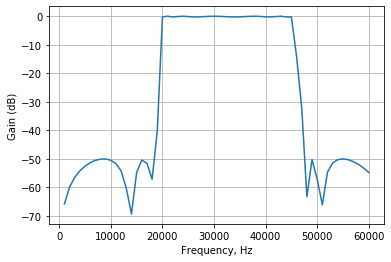

In [136]:
omega = np.arange(0, 60*1000*2*np.pi+0.0001, 2000*np.pi)
w, h = signal.freqs(num, den, worN=omega)

plt.plot(omega/(2*np.pi), 20*np.log10(np.abs(h)))
plt.xlabel('Frequency, Hz')
plt.ylabel('Gain (dB)')
plt.grid()

Consider a digital elliptic low-pass filter given by the following transfer function:
    
$$ 
H(z) = \frac{0.0798(1+z^{-1}+z^{-2}+z^{-3})}{1-1.556z^{-1}+1.272z^{-2}-0.398z^{-3}}
$$

Text(0.5, 1.0, 'Phase response')

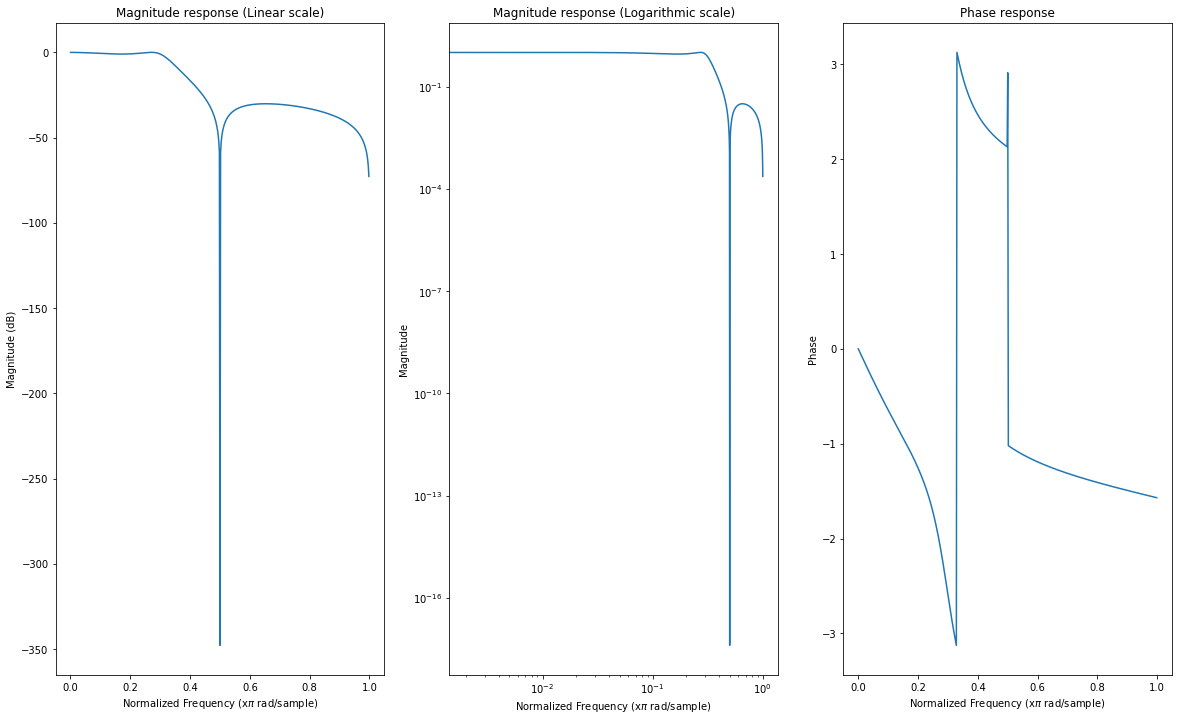

In [150]:
num = 0.0798 * np.ones(4)
den = [1, -1.556, 1.272, -0.398]
w, h = signal.freqz(num, den)

fig, ax = plt.subplots(1, 3, figsize=(20,12))
ax[0].plot(w/np.pi, 20*np.log10(np.abs(h)))
ax[0].set_xlabel('Normalized Frequency (x$\pi$ rad/sample)')
ax[0].set_ylabel('Magnitude (dB)')
ax[0].set_title('Magnitude response (Linear scale)')

ax[1].loglog(w/np.pi, np.abs(h))
ax[1].set_xlabel('Normalized Frequency (x$\pi$ rad/sample)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Magnitude response (Logarithmic scale)')

ax[2].plot(w/np.pi, np.angle(h))
ax[2].set_xlabel('Normalized Frequency (x$\pi$ rad/sample)')
ax[2].set_ylabel('Phase')
ax[2].set_title('Phase response')

## Butterworth, Chebyshov I, Chebyshov II and Elliptic low-pass filters

In [151]:
Apass = 0.4455
Astop = 40 # Min. attenuations (dB)
Fs = 8000  # Sampling rate (Hz)
Fpass = 1000 # Hz
Fstop = 1500 # Hz

Wp = Fpass/(Fs/2)
Ws = Fstop/(Fs/2)

Text(0.5, 1.0, 'n = 12 Butterworth Lowpass Filter')

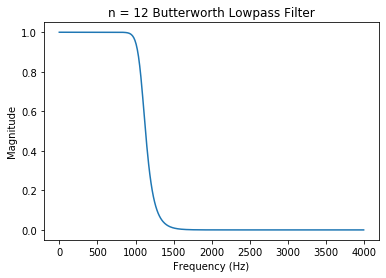

In [174]:
# Butterworth
n_butter, Wn_butter = signal.buttord(Wp, Ws, Apass, Astop)
num_butter, den_butter = signal.butter(n_butter, Wn_butter)
w_butter, h_butter = signal.freqz(num_butter, den_butter)

plt.plot(Fs/2*w_butter/np.pi, np.abs(h_butter))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('n = {} Butterworth Lowpass Filter'.format(n_butter))

Text(0.5, 1.0, 'n = 7 Chebychev I Lowpass Filter')

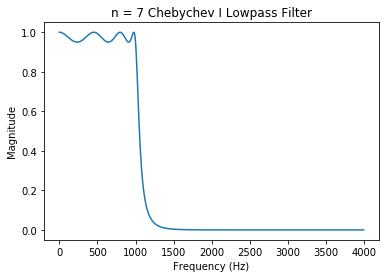

In [175]:
# Chebychev I
n_cheby1, Wp_cheby1 = signal.cheb1ord(Wp, Ws, Apass, Astop)
num_cheby1, den_cheby1 = signal.cheby1(n_cheby1, Apass, Wp_cheby1)
w_cheby1, h_cheby1 = signal.freqz(num_cheby1, den_cheby1)

plt.plot(Fs/2*w_cheby1/np.pi, np.abs(h_cheby1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('n = {} Chebychev I Lowpass Filter'.format(n_cheby1))

Text(0.5, 1.0, 'n = 7 Chebychev II Lowpass Filter')

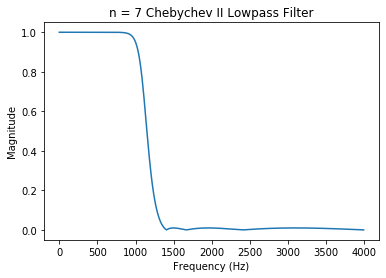

In [176]:
# Chebychev II
n_cheby2, Ws_cheby2 = signal.cheb2ord(Wp, Ws, Apass, Astop)
num_cheby2, den_cheby2 = signal.cheby2(n_cheby2, Astop, Ws_cheby2)
w_cheby2, h_cheby2 = signal.freqz(num_cheby2, den_cheby2)

plt.plot(Fs/2*w_cheby2/np.pi, np.abs(h_cheby2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('n = {} Chebychev II Lowpass Filter'.format(n_cheby2))

Text(0.5, 1.0, 'n = 5 Elliptic Lowpass Filter')

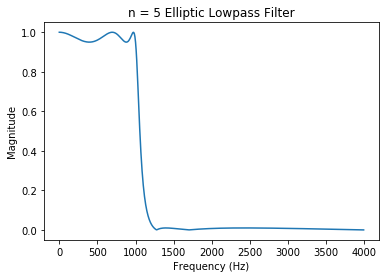

In [177]:
# Elliptic
n_elliptic, Wp_elliptic = signal.ellipord(Wp, Ws, Apass, Astop)
num_elliptic, den_elliptic = signal.ellip(n_elliptic, Apass, Astop, Wp_elliptic)
w_elliptic, h_elliptic = signal.freqz(num_elliptic, den_elliptic)

plt.plot(Fs/2*w_elliptic/np.pi, np.abs(h_elliptic))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('n = {} Elliptic Lowpass Filter'.format(n_elliptic))

## Design linear-phase FIR filter  using Remez Algorithm

In [192]:
def plot_fir(taps, Fs):
    """ Plotting the FIR characteristics"""
    
    freq, response = signal.freqz(taps)

    fig, ax = plt.subplots(3, 1, figsize=(20, 12))

    ax[0].stem(taps)
    ax[0].set_xlabel('n')
    ax[0].set_title('Impulse Response')
    ax[0].set_ylim([0,1])

    ax[1].plot(Fs/2*freq/np.pi, np.abs(response))
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Magnitude')
    ax[1].set_title('Magnitude Response')

    ax[2].plot(Fs/2*freq/np.pi, np.angle(response))
    ax[2].set_xlabel('Frequency (Hz)')
    ax[2].set_ylabel('Phase')
    ax[2].set_title('Phase Response')

    plt.tight_layout()
    

### Low-pass Filter

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


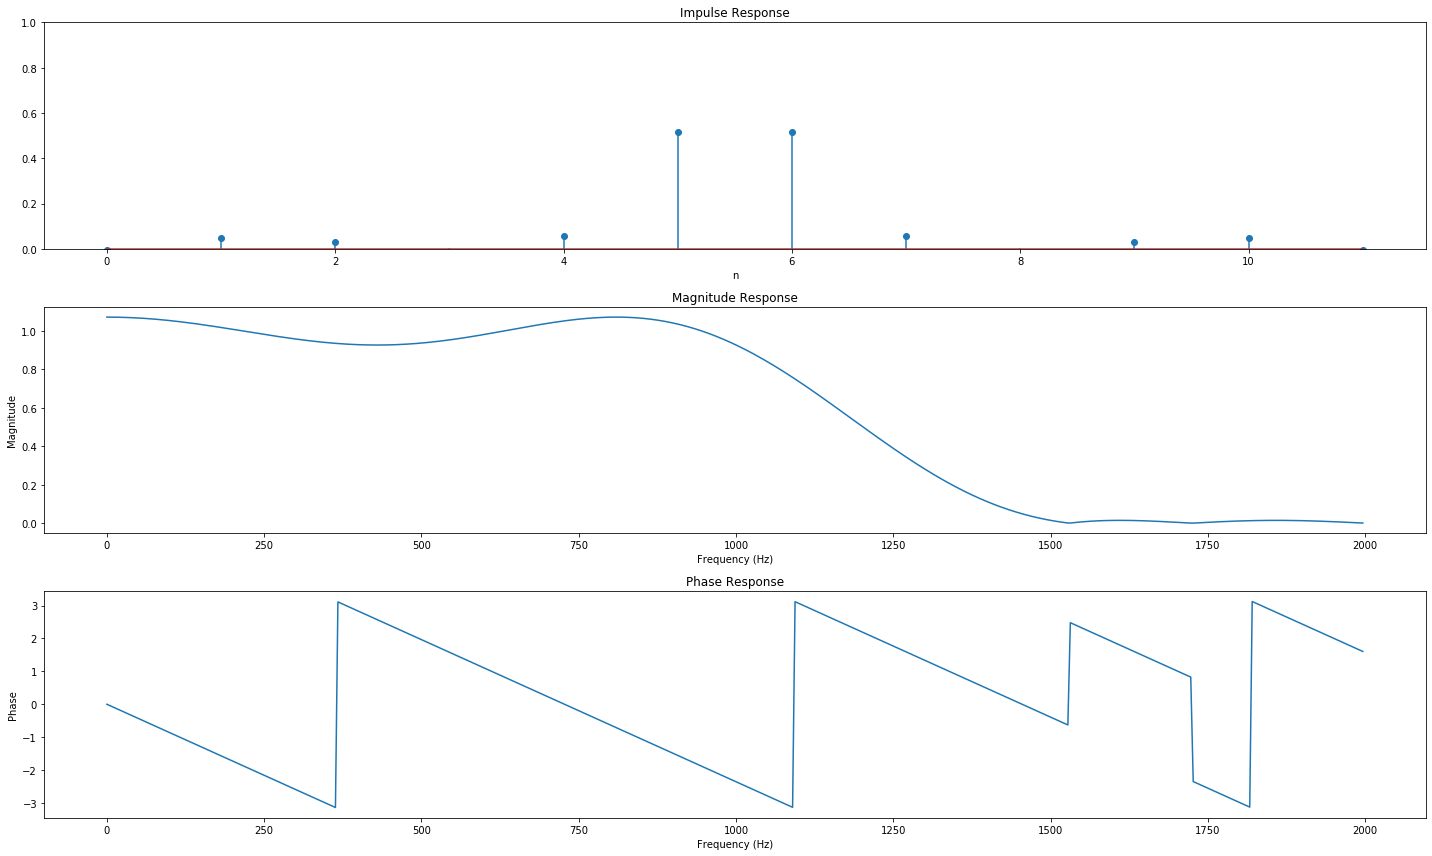

In [193]:
Fs = 4000 # sampling frequency (Hz)
ntaps = 12
fcutoff = [0, 1000, 1500, 2000] # cutoff frequencies
a = [1, 0] # desired amplitudes
taps = signal.remez(ntaps, fcutoff , a, fs=Fs, weight=[1, 5])
plot_fir(taps, Fs)

### High-pass Filter

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


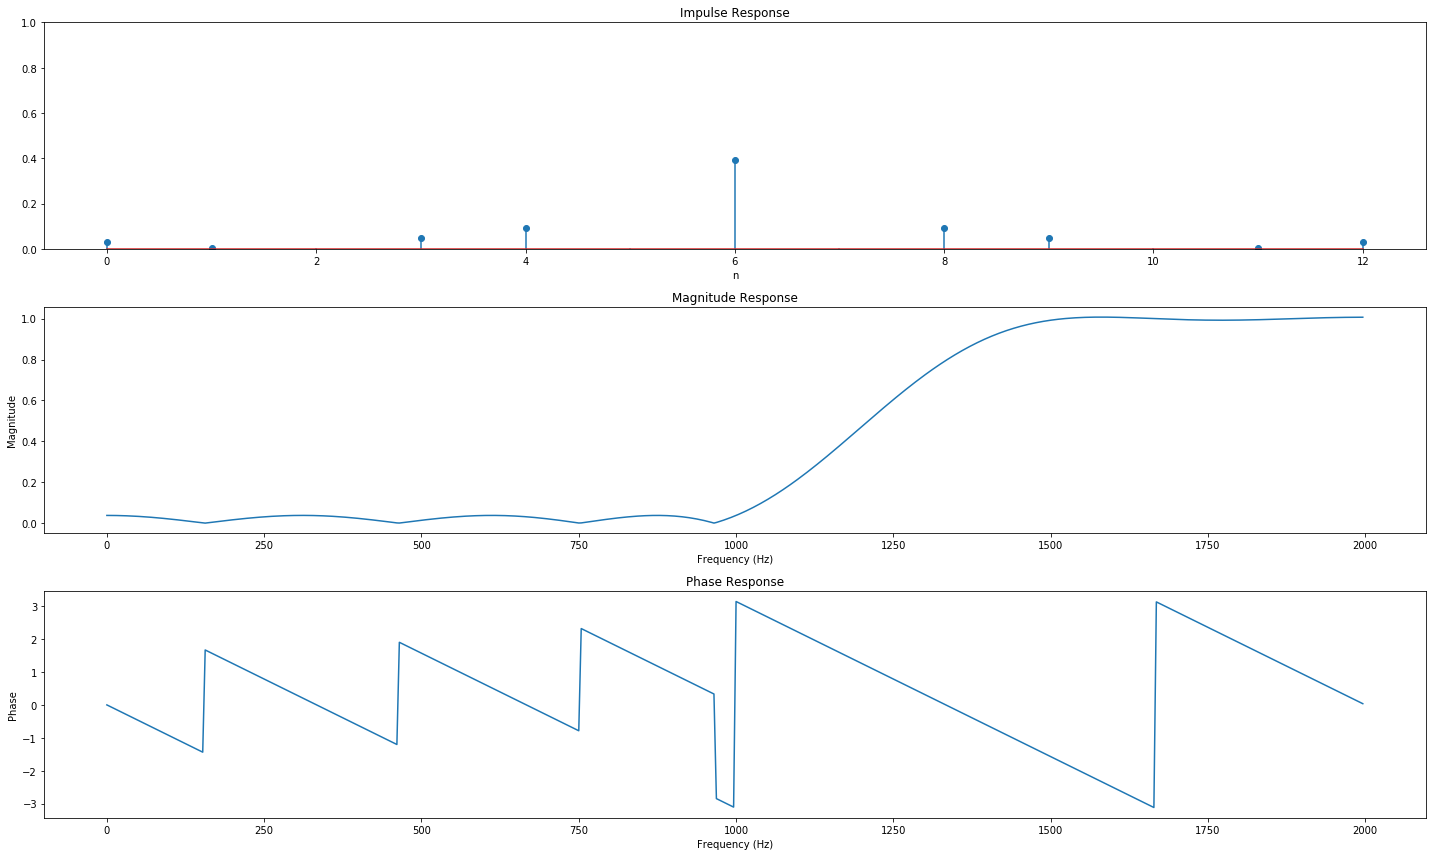

In [194]:
Fs = 4000
ntaps = 13
fcutoff = [0, 1000, 1500, 2000]
a = [0, 1]
taps = signal.remez(ntaps, fcutoff, a, fs=Fs, weight=[1, 5])
plot_fir(taps, Fs)

### Band-pass Filter

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


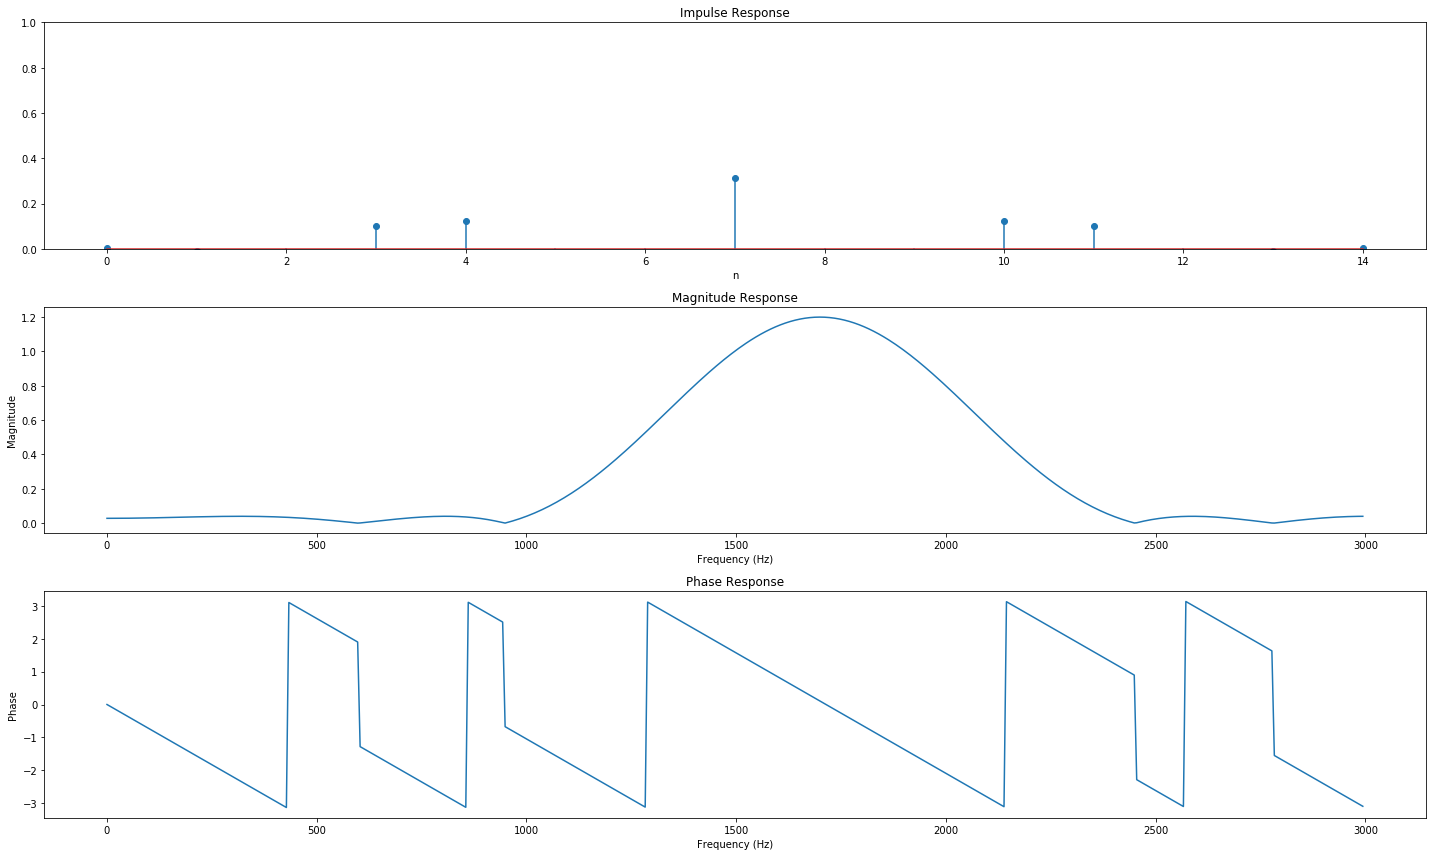

In [205]:
Fs = 6000
ntaps = 15
fcutoff = [0, 1000, 1400, 2000, 2400, 3000] 
a = [0,1,0]
taps = signal.remez(ntaps, fcutoff, a, fs=Fs, weight=[5,1,5])
plot_fir(taps, Fs)

### Band-stop filter

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


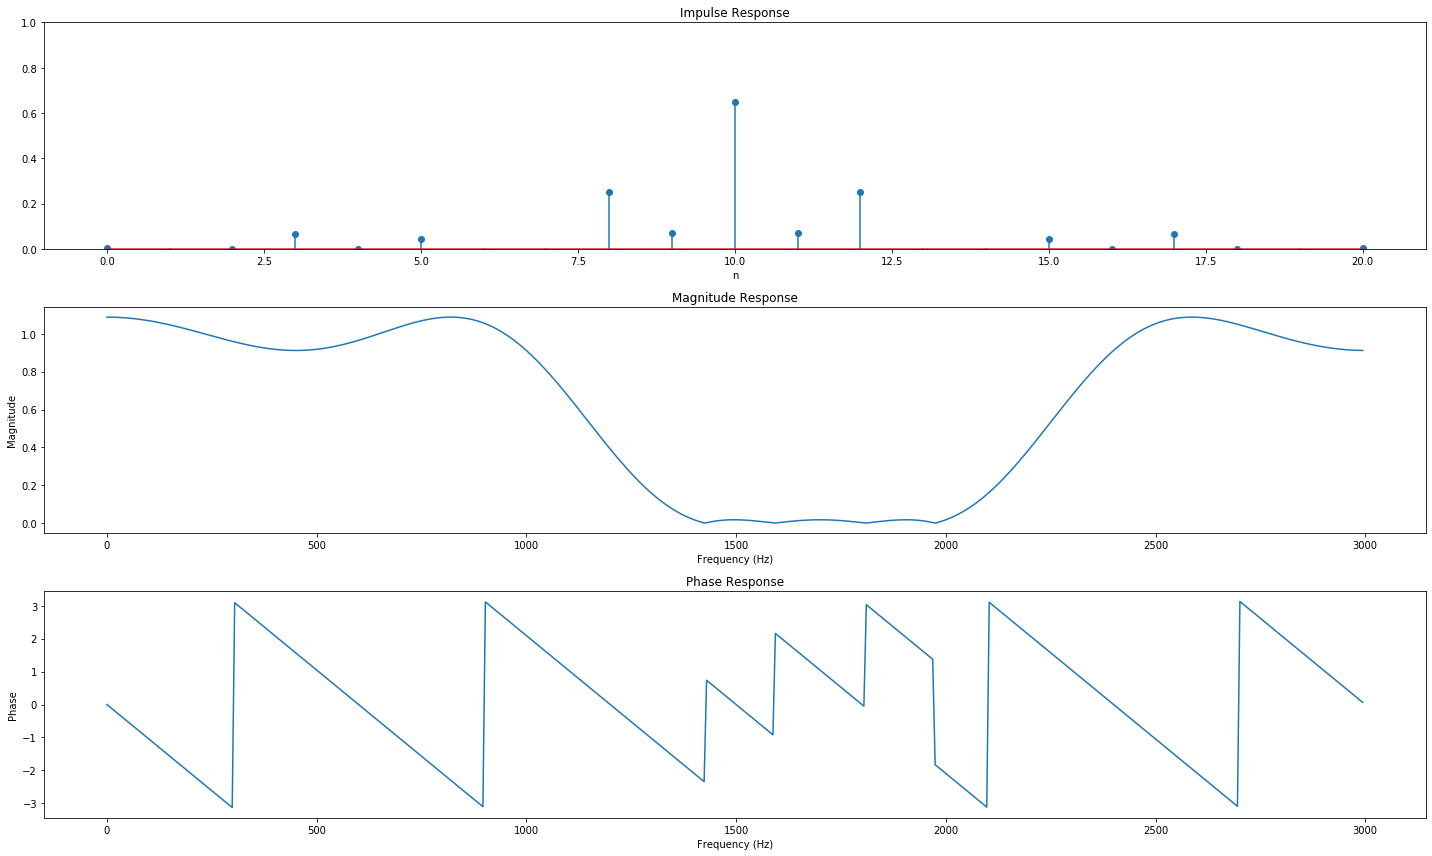

In [203]:
Fs = 6000
ntaps = 21
fcutoff = [0, 1000, 1400, 2000, 2400, 3000] 
a = [1,0,1]
taps = signal.remez(ntaps, fcutoff, a, fs=Fs, weight=[1,5,1])
plot_fir(taps, Fs)

### Example filtering with Remez FIR filter
- Create a signal with low and high frequency components and plot its spectrum

Text(0.5, 1.0, 'LPF signal Magnitude Response')

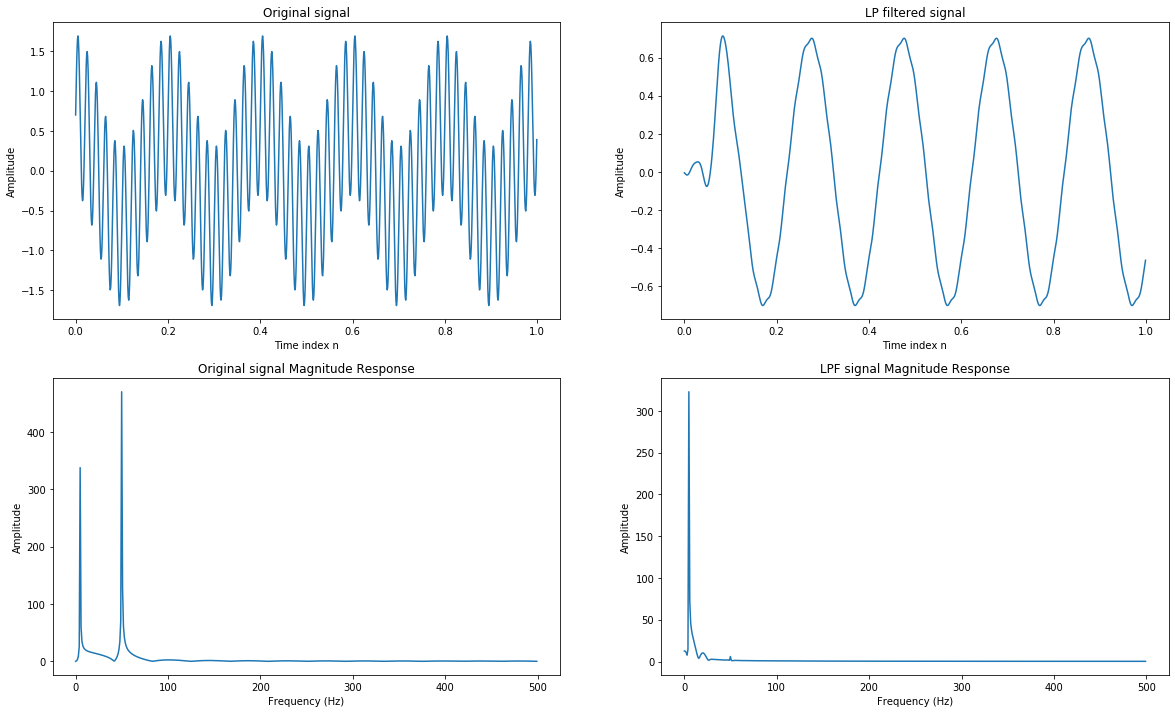

In [210]:
Fs = 1000 # sampling frequency
L = 1000 # length of the signal
n = np.arange(L)

# sum of a 5Hz sinusoid and a 120 Hz sinusoid
x = 0.7*np.cos(2*np.pi*5*n/Fs) + np.sin(2*np.pi*50*n/Fs)

taps = signal.remez(147, [0, 20,30,500], [1,0], fs=Fs, weight=[1,5])
x_LPF = signal.lfilter(taps, 1, x)

w, h = signal.freqz(x)
w_LPF, h_LPF = signal.freqz(x_LPF)

fig, ax = plt.subplots(2, 2, figsize=(20,12))
ax[0][0].plot(n/Fs, x)
ax[0][0].set_xlabel('Time index n')
ax[0][0].set_ylabel('Amplitude')
ax[0][0].set_title('Original signal')

ax[0][1].plot(n/Fs, x_LPF)
ax[0][1].set_xlabel('Time index n')
ax[0][1].set_ylabel('Amplitude')
ax[0][1].set_title('LP filtered signal')

ax[1][0].plot(Fs/2*w/np.pi, np.abs(h))
ax[1][0].set_xlabel('Frequency (Hz)')
ax[1][0].set_ylabel('Amplitude')
ax[1][0].set_title('Original signal Magnitude Response')

ax[1][1].plot(Fs/2*w_LPF/np.pi, np.abs(h_LPF))
ax[1][1].set_xlabel('Frequency (Hz)')
ax[1][1].set_ylabel('Amplitude')
ax[1][1].set_title('LPF signal Magnitude Response')